# Movies_Review_Classification in NLP

## Import required libraries

In [9]:
import pandas as pd
import numpy as np
import re
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer



NameError: name 'type_check' is not defined

## Load movies review data and show top 5 rows

In [4]:
df = pd.read_csv("IMDB Dataset.csv")

In [42]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Perform EDA

In [43]:
df.shape

(50000, 2)

In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [44]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [10]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

#plot1

In [5]:
a1=len(df[(df['sentiment']=='positive')])
a2=len(df[(df['sentiment']=='negative')])
data = {'sentiment': ['positive','negative'],'count': [a1,a2]}
dff = pd.DataFrame(data)
dff.plot(x='sentiment', y='count', kind='bar')


#plot2

c:\Users\ADH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

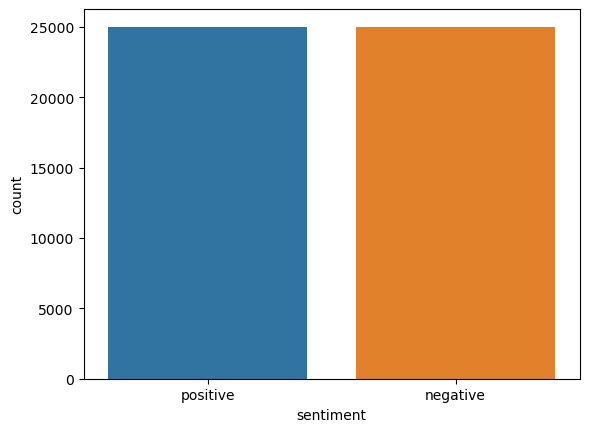

In [11]:
sns.countplot(df['sentiment'])

## Apply LabelEncoding to make target feature into numerical (Positive : 1 , Negative : 0)

In [7]:
label = LabelEncoder()
label


LabelEncoder()

In [8]:
df['sentiment'] = label.fit_transform(df['sentiment'])

In [51]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## Divide data into independent and dependent

In [9]:
X = df['review']
y = df['sentiment']

Tokenize

In [ ]:
from nltk.tokenize import sent_tokenize
text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)



## Remove all special and numeric character from data and also remove stopwards and apply stemming

https://www.datacamp.com/tutorial/stemming-lemmatization-python

In [29]:
ps = PorterStemmer()
corpus = []

for i in range(len(X)):
    #print(i)
    review = re.sub("[^a-zA-Z]"," ", X[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)

69m 42s


In [ ]:
corpus

#Save corpus

In [ ]:
pickle.dump(corpus , open("corpus.pkl" , "wb"))


In [10]:
corpus1 = pickle.load(open('corpus.pkl','rb'))


## Apply TfidfVectorizer to make text data into vectors

https://stackoverflow.com/questions/46118910/scikit-learn-vectorizer-max-features

#TfidfVectorizer ngram_range=(1,1)

In [ ]:
cv = TfidfVectorizer(max_features=5000)
X = cv.fit_transform(corpus1).toarray()

#TfidfVectorizer ngram_range=(1,2)

In [11]:
cv = TfidfVectorizer(max_features=5000,ngram_range=(1,2))
X = cv.fit_transform(corpus1).toarray()

In [12]:
X.shape
X[0][0:500]

(50000, 5000)

In [99]:
from matplotlib import pyplot as plt
import numpy as np 
plt.hist(X)
plt.title("Numpy Histogram")
plt.show()

#2-CountVectorizer

In [35]:
cv = CountVectorizer(binary=True)
cv.fit(corpus1)
X = cv.transform(corpus1)

In [101]:
X.shape

(50000, 5000)

## Split data into train and test

#LogisticRegression 

In [19]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y , test_size=0.2 , random_state=101)

In [20]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((40000, 5000), (10000, 5000), (40000,), (10000,))

In [14]:
X.shape , y.shape

((50000, 5000), (50000,))

Calssifier

#Project2  NaiveBayesClassifier
https://scikit-learn.org/stable/modules/naive_bayes.html

#1

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (Y_test != y_pred).sum()))

#2

In [ ]:
gnb = MultinomialNB()
y_pred = gnb.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (Y_test != y_pred).sum()))

#3

In [31]:
gnb = LogisticRegression()
y_pred = gnb.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (Y_test != y_pred).sum()))

Number of mislabeled points out of a total 10000 points : 1059


#4
https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

In [34]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC
from sklearn import model_selection
gnb = SVC(kernel='linear')
y_pred = gnb.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (Y_test != y_pred).sum()))

Test Liner to end

In [ ]:
from sklearn.linear_model import LogisticRegression

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, Y_train)
    print ("Accuracy for C=%s: %s"%(c, accuracy_score(Y_test, lr.predict(X_test))))
    

In [ ]:
final_model = LogisticRegression()
final_model.fit(X_train, Y_train)
print ("Accuracy for C=%s: %s"%(c, accuracy_score(Y_test, final_model.predict(X_test))))

In [ ]:
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), final_model.coef_[0]
    )
}
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)
    
#     ('excellent', 0.9288812418118644)
#     ('perfect', 0.7934641227980576)
#     ('great', 0.675040909917553)
#     ('amazing', 0.6160398142631545)
#     ('superb', 0.6063967799425831)
    
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)
    
#     ('worst', -1.367978497228895)
#     ('waste', -1.1684451288279047)
#     ('awful', -1.0277001734353677)
#     ('poorly', -0.8748317895742782)
#     ('boring', -0.8587249740682945)

In [ ]:
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), final_model.coef_[0]
    )
}
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)
    
#     ('excellent', 0.9288812418118644)
#     ('perfect', 0.7934641227980576)
#     ('great', 0.675040909917553)
#     ('amazing', 0.6160398142631545)
#     ('superb', 0.6063967799425831)
    
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)
    
#     ('worst', -1.367978497228895)
#     ('waste', -1.1684451288279047)
#     ('awful', -1.0277001734353677)
#     ('poorly', -0.8748317895742782)
#     ('boring', -0.8587249740682945)

In [ ]:
pred = final_model.predict(X_test)
pred

In [ ]:
print(accuracy_score(Y_test , pred))
print('----------------------------------')
print(confusion_matrix(Y_test , Y_test))
print('----------------------------------')
print(confusion_matrix(Y_test , pred))
print('----------------------------------')
print(classification_report(Y_test , pred))

In [ ]:
pd.DataFrame(np.c_[Y_test , pred] , columns=["Actual" , "Predicted"])

In [26]:
def test_model_LogisticRegression(sentence):
    sen = cv.transform([sentence]).toarray()
    res = final_model.predict(sen)[0]
    if res == 1:
        return '+'#'Positive review'
    else:
        return '-'#'Negative review'

## Old way

## Define naive-bayes model

In [51]:
mnb = MultinomialNB()
mnb.fit(X_train , Y_train)

MultinomialNB()

## test model using test data

In [52]:
pred = mnb.predict(X_test)
pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

## Check accuracy_score, confusion_matrix  and classification_report

In [53]:
print(accuracy_score(Y_test , pred))
print('----------------------------------')
print(confusion_matrix(Y_test , Y_test))
print('----------------------------------')
print(confusion_matrix(Y_test , pred))
print('----------------------------------')
print(classification_report(Y_test , pred))

0.8518
----------------------------------
[[4959    0]
 [   0 5041]]
----------------------------------
[[4215  744]
 [ 738 4303]]
----------------------------------
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4959
           1       0.85      0.85      0.85      5041

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## Difference between Actual and predicted data

In [54]:
pd.DataFrame(np.c_[Y_test , pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
9995,1,1
9996,0,0
9997,0,0
9998,1,1


## Save my trained naive-bayes model and TfidfVectorizer

In [55]:
pickle.dump(cv , open("count-Vectorizer.pkl" , "wb"))
pickle.dump(mnb , open("Movies_Review_Classification.pkl" , "wb"))  # 1: pos , 0:Neg

## Load my naive-bayes model and TfidfVectorizer

In [82]:
save_cv = pickle.load(open('count-Vectorizer.pkl','rb'))
model = pickle.load(open('Movies_Review_Classification.pkl','rb'))

## define my function to test model 

In [86]:
def test_model(sentence):
    sen = save_cv.transform([sentence]).toarray()
    res = model.predict(sen)[0]
    if res == 1:
        return '+'#'Positive review'
    else:
        return '-'#'Negative review'

## Test first positive review and check that what does model predict and it predicted correct

In [ ]:
sen = """
They really ramped up the intensity in this one and they did good. These action scenes are just so unbelievable and awesome. I'm a reserved guy and this movie almost had me yelling at my tv. Heart pounding fun.

The plot did lose me for a minute somewhere in the middle with loyalties changing but it was explained soon after.

It will be hard to top this one in the next installment!
"""

In [116]:
sen = '''
I watch a lot of movies and I like to give them all a chance just in case there is something interesting or exciting to warrant a viewing Unfortunately this movie has none of these features it is pointless and offers nothing in the way of story line,acting or direction The plot is non-existent with the actors just going through the motions and the dialogue is sooo boring its embarrassing. I wish the previous reviewers had posted earlier as this would have saved me 95 mins of my time
 '''

In [117]:
res = test_model(sen)
res_LogisticRegression = test_model_LogisticRegression(sen)
print('res =====================>',res)
print('res_LogisticRegression===>',res_LogisticRegression)


res =====================> -
res_LogisticRegression===> -


## Test second negative review and check that what does model predict and it predicted correct

In [68]:
sen = '''
I watch a lot of movies and I like to give them all a chance just in case there is something interesting or exciting to warrant a viewing Unfortunately this movie has none of these features it is pointless and offers nothing in the way of story line,acting or direction The plot is non-existent with the actors just going through the motions and the dialogue is sooo boring its embarrassing. I wish the previous reviewers had posted earlier as this would have saved me 95 mins of my time

 
 '''
res = test_model(sen)
print(res)

Negative review
